### MNIST Image Classification on Digits
* In this project I am using MNIST dataset of digits images to classify each image into a class of digits 0-9.
* KAGGLE LINK: https://www.kaggle.com/c/digit-recognizer

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [3]:
mnist_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
mnist_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [4]:
print(mnist_train.shape, mnist_test.shape)

(42000, 785) (28000, 784)


In [5]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Data Cleaning and Normalization
Data is totally clean in this case.

In [7]:
mnist_train.isna().any().any()
# There is no empty field. Data is clean already.

False

In [8]:

mnist_train_data = mnist_train.loc[:, "pixel0":]
mnist_train_label = mnist_train.loc[:, "label"]

# Data Normalization
mnist_train_data = mnist_train_data/255.0
mnist_test = mnist_test/255.0

### Visulaize a single digit

In [9]:
digit_array = mnist_train.loc[3, "pixel0":]
arr = np.array(digit_array) #.reshape(a, (28,28))
image_array = np.reshape(arr, (28,28))

IMAGE LABEL: 4


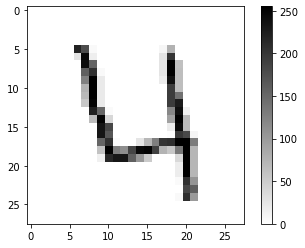

In [10]:
digit_img = plt.imshow(image_array, cmap=plt.cm.binary)
plt.colorbar(digit_img)
print("IMAGE LABEL: {}".format(mnist_train.loc[3, "label"]))

[4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]


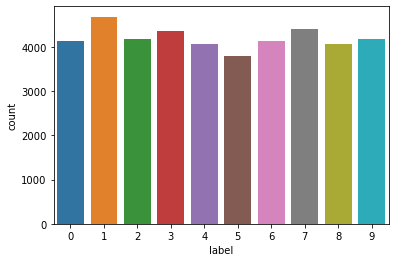

In [11]:
sns.countplot(mnist_train.label)
print(list(mnist_train.label.value_counts().sort_index()))

In [12]:
# Converting dataframe into arrays
mnist_train_data = np.array(mnist_train_data)
mnist_train_label = np.array(mnist_train_label)

In [13]:
mnist_train_data = mnist_train_data.reshape(mnist_train_data.shape[0], 28, 28, 1)
print(mnist_train_data.shape, mnist_train_label.shape)

(42000, 28, 28, 1) (42000,)


### Training data
Training a neural network with one input layer, one hidden layer and one output layer for learning the digits in images.

In [14]:
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adadelta
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


### Encoding train labels

In [15]:
nclasses = mnist_train_label.max() - mnist_train_label.min() + 1
mnist_train_label = to_categorical(mnist_train_label, num_classes = nclasses)
print("Shape of ytrain after encoding: ", mnist_train_label.shape)

Shape of ytrain after encoding:  (42000, 10)


### Building Model

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
model_history = model.fit(mnist_train_data, mnist_train_label, shuffle=True, epochs=50, validation_split=0.2)

Epoch 1/50
1050/1050 [==============================] - 7s 7ms/step - loss: 0.2534 - accuracy: 0.9208 - val_loss: 0.0929 - val_accuracy: 0.9721
Epoch 2/50
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0850 - accuracy: 0.9745 - val_loss: 0.0461 - val_accuracy: 0.9846
Epoch 3/50
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0658 - accuracy: 0.9798 - val_loss: 0.0340 - val_accuracy: 0.9896
Epoch 4/50
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0583 - accuracy: 0.9819 - val_loss: 0.0417 - val_accuracy: 0.9885
Epoch 5/50
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0523 - accuracy: 0.9841 - val_loss: 0.0337 - val_accuracy: 0.9901
Epoch 6/50
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0270 - val_accuracy: 0.9919
Epoch 7/50
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0401 - accuracy: 0.9882 - val_loss: 0.0282 - val_accuracy:

### Model Performance Plots

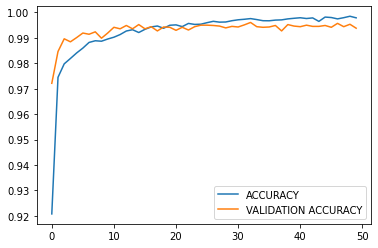

In [24]:
plt.plot(model_history.history['accuracy'],label = 'ACCURACY')
plt.plot(model_history.history['val_accuracy'],label = 'VALIDATION ACCURACY')
plt.legend()

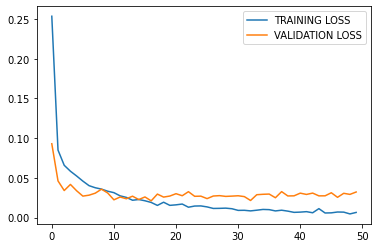

In [25]:
plt.plot(model_history.history['loss'],label = 'TRAINING LOSS')
plt.plot(model_history.history['val_loss'],label = 'VALIDATION LOSS')
plt.legend()

### Transforming testing data

In [26]:
mnist_test_arr = np.array(mnist_test)
mnist_test_arr = mnist_test_arr.reshape(mnist_test_arr.shape[0], 28, 28, 1)
print(mnist_test_arr.shape)

(28000, 28, 28, 1)


### Prediction & Submission

In [27]:
predictions = model.predict(mnist_test_arr)

In [28]:
predictions_test = []

for i in predictions:
    predictions_test.append(np.argmax(i))

In [29]:
submission =  pd.DataFrame({
        "ImageId": mnist_test.index+1,
        "Label": predictions_test
    })

submission.to_csv('my_submission.csv', index=False)

## Please upvote the notebook if you like this simple approach :)